# MLS VS OLS

## CREATING DATASET 

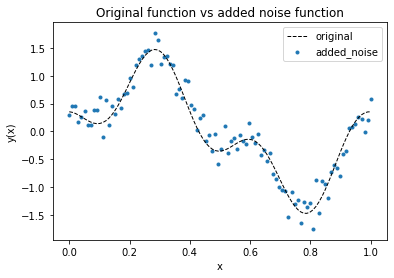

In [1]:
import matplotlib.pyplot as plt
import numpy as np


#original fucntion -> N values 
x = np.linspace(0, 1, 100) # "observations" [1 x N]
y = np.sin(2 * np.pi * x) + 0.5 * np.cos(6 * np.pi * x + (np.pi / 4)) #[Nx1]

noise = np.random.normal(0,0.2,100) #[1 x N]
noisy_y = y + noise #[1 x N] 

#plot function vs function with noise
plt.plot(x, y, color='k', linestyle='--', linewidth='1', label='original')
plt.scatter(x, noisy_y, marker='.', label='added_noise')
plt.title('Original function vs added noise function')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

## OLS fit

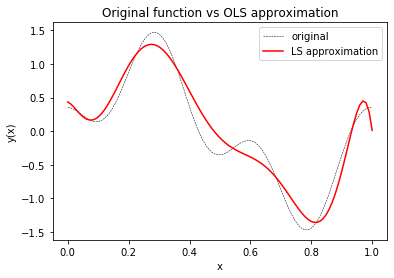

In [2]:
#fit using polynomial basis -> 2nd parameter of polyfit function describes the Mth order of used polynome 
#(8th order in this example)
# this represents calculated coefficients "beta" 
ols_fit = np.polyfit(x.reshape(1, -1)[0], noisy_y.reshape(1, -1)[0], 8) #[1 x (M + 1)]

#plot original vs OLS approximation
plt.plot(x, y, color='k', linestyle='--', linewidth='0.5', label='original')
plt.plot(x, np.polyval(ols_fit, x), 'r', label='LS approximation')
plt.legend()
plt.title('Original function vs OLS approximation')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.show()

## MLS model creation & fit

In [3]:
def create_design_matrix(x):
    '''
    
    IN - vector of independent variable values (where y(x) is known); [1 x N]
    
    OUT - "design" matrix [N x (M+1)]; each row represents one particular observation; each column corresponds to one
          "element" of selected basis
    '''
    
    ones_col = np.ones(len(x)).reshape(-1,1) # [N x 1]
    bases_to_P = (ones_col,x.reshape(-1,1),x.reshape(-1,1)**2) # the base is defined here 
    
    return np.hstack(bases_to_P)

In [4]:
#choose values where we want to get y(x) approximation
unknowns = np.linspace(0, 1, 100) #[1 x N]

#setting parameters for MLS algorithm
h = 0.01 ## interval between observations
dmi = 20 * h ## weighting diameter
gauss_coef = 3 ## gauss function coefficient


# create design matrix
P = create_design_matrix(x) #[N x (M+1)]

# initialize empty array = placeholder for approximated y(x) vector
mls_fit = np.array([]) #[]

#loop over unknowns points (y(unk) will be approximated)
for unk in unknowns:
    
    # calculate relative distances between unknown point and each x (or "observation"); # [1 x N]
    r = np.abs(x - unk) / dmi 
    
    # calculate "weight for each x" [1 x N]
    w = (np.where(r <= 1, (np.exp((-r ** 2) * (gauss_coef ** 2)) - np.exp(-gauss_coef ** 2))  
                  / (1 - np.exp(-gauss_coef ** 2)), 0)) 
    
    # put weights into diagonal matrix [N x N]
    W = np.diag(w) 
    
    #computation of matrices used for coefficients calculation
    A = np.dot(np.dot(P.T, W), P) #[M x M]
    A_inv = np.linalg.inv(A) #[M x M]
    B = np.dot(P.T, W) #[M x N]
    
    # here we need to use selected base
    p = np.hstack([1, unk, unk ** 2]) #[1 x M]
    
    #create shape function
    shape_func = np.dot(np.dot(p, A_inv), B) #[1 x N]
    
    #append approximate value to final vector
    mls_fit = np.append(mls_fit, shape_func.dot(y)) #[1 x N]

# RESULTS

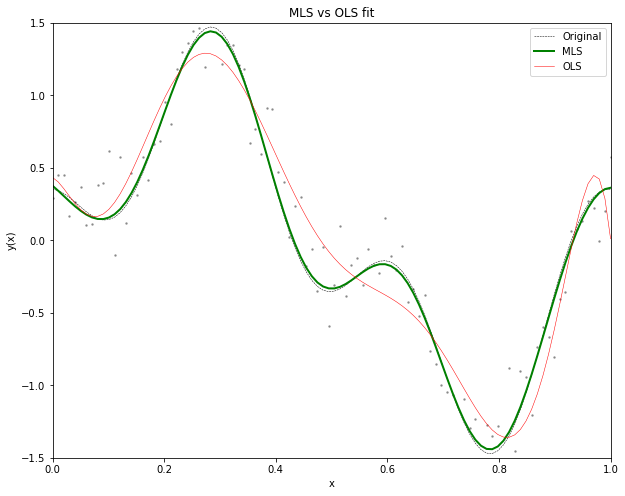

In [6]:
plt.scatter(x, noisy_y, marker='.', s=10, color='k', alpha=0.3)
plt.plot(x, y, 'k--', label='Original', linewidth=0.5)
plt.plot(unknowns, mls_fit, 'g', linewidth=2, label='MLS')
plt.plot(x, np.polyval(ols_fit, x), 'r', label='OLS', linewidth=0.5)

fig = plt.gcf()
fig.set_size_inches(10, 8)


plt.xlim(0,1)
plt.ylim(-1.5,1.5)
plt.title('MLS vs OLS fit')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
